<a href="https://colab.research.google.com/github/Felipe4356/actividad_practico_de_marching-learning/blob/main/date_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***introducion***
**como objetivo analisis exploraremos los conjuntos de datos del data frame de (nombre) utilizaremos  tecnicas de estadisticas de discriptivas  y viusalizar los datos**


Esportaremos las librerias importante para hacer el analizis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

# **instalacion del data frame**
para la instalacion del data frame  instalaremos de forma local y mostraremos las 10 registros de el data frame

In [3]:

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
 name=fn
df = pd.read_csv(name, sep=",")
df.head(6)



Saving Pokemon.csv to Pokemon.csv


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


# **Revisr los tipo de datos encontrado en el Data Frame**

In [ ]:
df.dtypes

,0
#,int64
Name,object
Type 1,object
Type 2,object
Total,int64
HP,int64
Attack,int64
Defense,int64
Sp. Atk,int64
Sp. Def,int64


resultados en el data frame se puede decir que los tipos datos usado  en cada columnas  son  object tipo texto, init como numeros y booleanos

# **encontrar y eliminar datos duplicado**

In [ ]:
#observar la cantidas de cada fila y columnas del data frame
df.shape

(800, 13)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


In [ ]:
# prompt: ver la cantidad de datos  de cada columna

# Count the number of non-missing values in each column
df.count()


,0
#,800
Name,800
Type 1,800
Type 2,414
Total,800
HP,800
Attack,800
Defense,800
Sp. Atk,800
Sp. Def,800


resultado no se encontro datos duplicado que tendriamos que eliminar y como observacion sabemos hay 800 datos en cada de las 13 columna el data frame

# **Observar y Eliminar datos nulos**

en esta parte observaremos la catidad de datos nulos poder eliminar para poder dejar limpio data set poder hacer un analisis

In [ ]:
#observar los datos que se deberia eliminar
print(df.isnull().sum())

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [ ]:
df = df.dropna()    #  eliminar valores nulos de la base de datos
df.count()

,0
#,414
Name,414
Type 1,414
Type 2,414
Total,414
HP,414
Attack,414
Defense,414
Sp. Atk,414
Sp. Def,414


 OPCION 1 resultados:

hemos elimninado las filas que tenian datos nulos como se ve ahora en cada columna hay 414 datos en el data frame

In [4]:

df.fillna("no registrado", inplace=True)
print(df.isnull().sum())
df.head(6)

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,no registrado,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,no registrado,405,58,64,58,80,65,80,1,False


opcion 2 resultados :
Para este tipo de datos no es posible borrar los nulos por eso renombre los datos Nan   que no registran datos

# **diagrama de cajas**

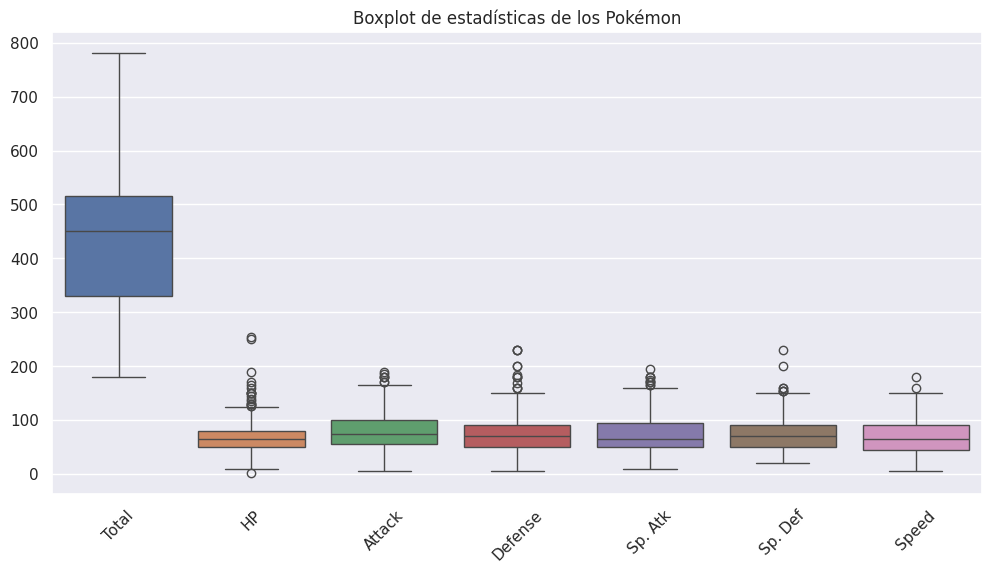

In [ ]:


# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
plt.xticks(rotation=45)
plt.title("Boxplot de estadísticas de los Pokémon")
plt.show()


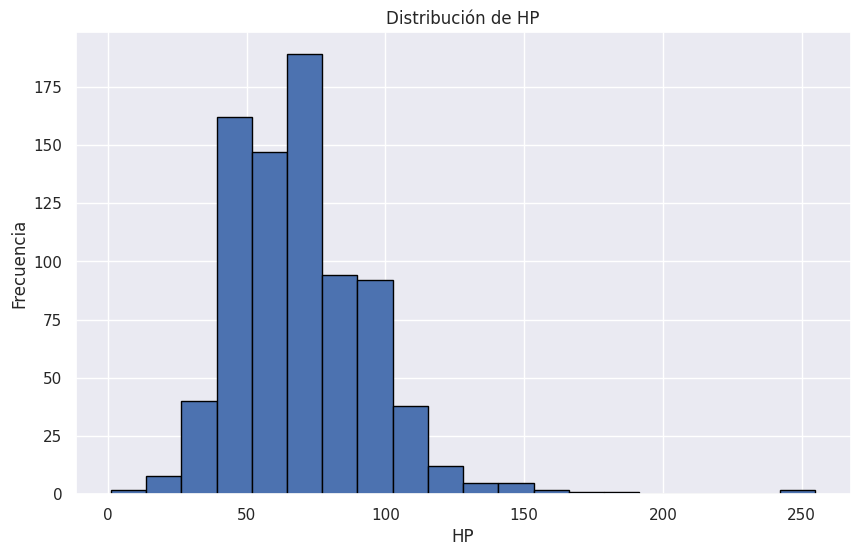

In [ ]:
# Histograma de 'HP'
plt.figure(figsize=(10, 6))
df['HP'].hist(bins=20, edgecolor='black')
plt.title('Distribución de HP')
plt.xlabel('HP')
plt.ylabel('Frecuencia')
plt.show()

Resultados

Lo que se ve en el grafico tiene una forma casi una distribución normal igual se pude decir que los pokemones que tienen 70 a 75 son mucho

In [ ]:


# Calcular cuartiles y límites
Q1 = df['HP'].quantile(0.25)
Q2 = df['HP'].median()  # o quantile(0.5)
Q3 = df['HP'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q2 (mediana): {Q2}, Q3: {Q3}")

Q1: 50.0, Q2 (mediana): 65.0, Q3: 80.0
Límite superior para outliers: 125.0


resultado
al hacer el analisis de datos de cuartil  se podria decir que  Q1 25% de los pokemones tienen 50 HP  Q2: representa que los pokemones tienen igual o inferior 65 HP Y Q3 SEÑALA QUE 75% de los pokemones tienen 80 HP


Regresion Lineal

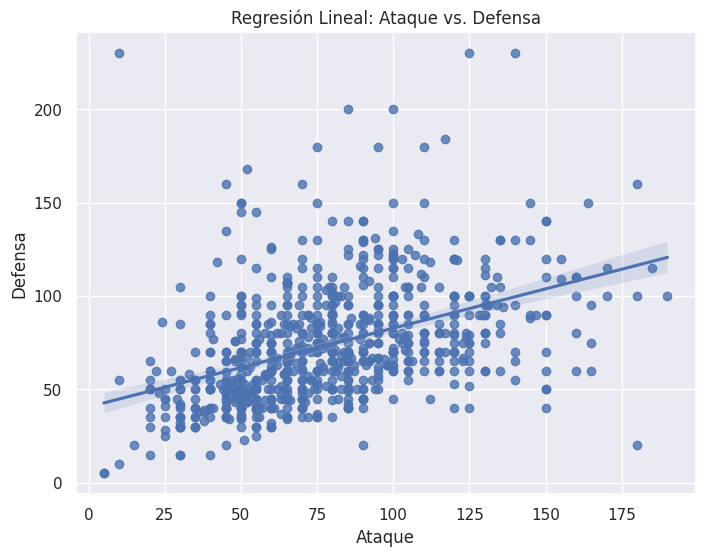

In [13]:

plt.figure(figsize=(8, 6))
sns.regplot(x='Attack', y='Defense', data=df)
plt.title('Regresión Lineal: Ataque vs. Defensa')
plt.xlabel('Ataque')
plt.ylabel('Defensa')
plt.show()

Resultado:

El gráfico muestra la relación entre "Ataque" y "Defensa" mediante un diagrama de dispersión con una línea de regresión lineal. La línea de regresión tiene una pendiente positiva, lo que indica que existe una relación positiva moderada entre el ataque y la defensa. Hay algunos valores atípicos presentes, pero la tendencia general muestra que a medida que aumenta el ataque, la defensa también tiende a aumentar.

# **sacar la media y la moda de defensa y speed**

In [ ]:
#sacar la media y la moda de defensa y speed
print("Media de la columna 'Defense':", df['Defense'].mean())
print("Moda de la columna 'Defense':", df['Defense'].mode()[0])
print("Moda de la columna 'Defense':", df['Speed'].mode()[0])
print("Media de la columna 'Speed':", df['Speed'].mean())

Media de la columna 'Defense': 73.8425
Moda de la columna 'Defense': 70
Moda de la columna 'Defense': 50
Media de la columna 'Speed': 68.2775


se

observar la media defense y moda speed y la desviacion

In [ ]:

df['Defense'].mean()



np.float64(73.8425)

In [ ]:
df['Speed'].mode()

,Speed
0,50


resultado:

al ser el analisis de la moda y la media se puede decir que en la defensa en promedio  de los pokemonres tienen estadistica defensa de alrededor de 73.8

y la velocidad el valo mas frecuente(moda) en la columna speed es 50 otra forma de decirlo es mas comun entre los pokemones

In [12]:

df['HP'].std()

25.534669032332047

resultado:

el resultado indica que 23.53  de los puntos de vida hp de los pokemones en el data set varian,en promedio 25.53 puntos por encima  o por debajo del HP

# **Mapa de calor con correlacion**

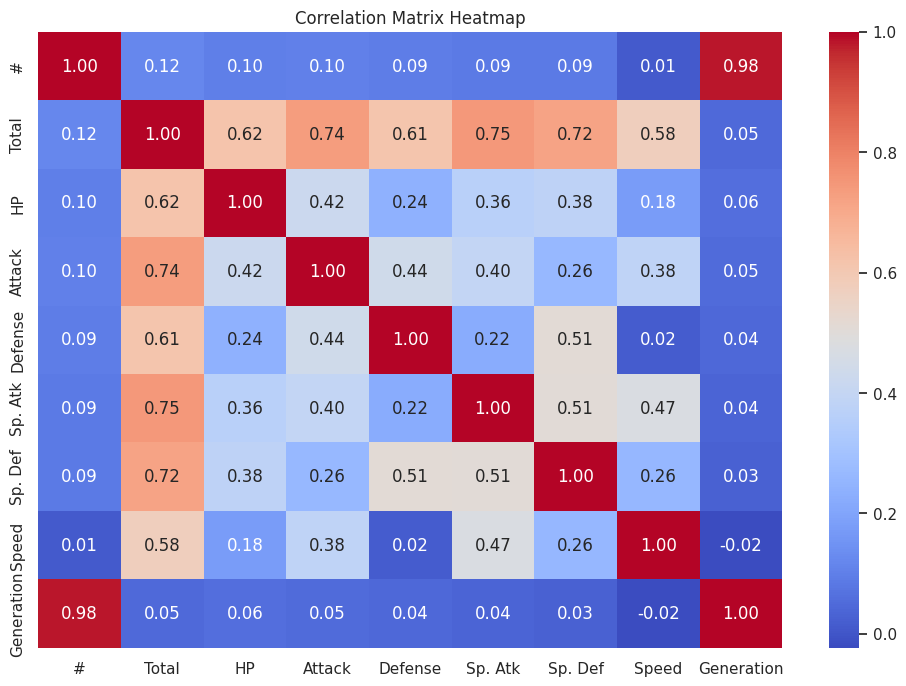

In [11]:


# Calculate the correlation matrix, only including numerical features
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


Resultado:

se puede decir que hay una correlacion positva casi perfeccta con la columna # y generacion(0.98)

ademas  otras columnas como ataque(0.74) sp .atk(0.75) sp. def(0.72) tienen una correlacion fuerte

donde se encuentran correlaciones moderadamente altas serian HP(0.62),Defense(0.61)  speed(0.58)